In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt

In [3]:
def plot_result(result,start_from=1,period=20,file_name="result",title="Event Study Coefficients with Confidence Intervals"):
    summary_table=pd.DataFrame(result.summary.tables[1].data[start_from:start_from+period+1],columns=result.summary.tables[1].data[0])
    summary_table["Time"]=np.array(list(range(-5,period-5+1)))
    # make each column of summary_table numeric
    summary_table=summary_table.apply(pd.to_numeric, errors='ignore')
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plot coefficients as points
    plt.plot(summary_table['Time'], summary_table["Parameter"], 'o-', label='Coefficients', color='b')

    # Plot confidence intervals as error bars
    # plt.errorbar(summary_table['Time'], summary_table["Parameter"],
    #              yerr=[summary_table["Parameter"] - summary_table['Lower CI'],
    #                    summary_table['Upper CI'] - summary_table["Parameter"]],
    #              fmt='none', ecolor='orange', elinewidth=2, capsize=4, label='Confidence Intervals')

    plt.fill_between(summary_table['Time'], summary_table['Lower CI'], summary_table['Upper CI'], color='orange', alpha=0.3, label='Confidence Intervals')

    plt.xlabel('Time')
    plt.ylabel("Parameter")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("./plots/{}.png".format(file_name),dpi=300,bbox_inches="tight",transparent=False,facecolor="white")
    plt.show()

In [4]:
df=pd.read_csv("../data/merged/len4_ndb_agg_in_oral_DropNever.csv",encoding="shift-jis",index_col=0)

In [5]:
## processing
df_columns = df.columns # 列名をリストとして取得
import re

# 正規表現パターンを作成します
pattern = r'id|^elasped_(m[0-5]|[0-9]|1\d|20)$'

# 列名のリストを作成します
column_names = [col for col in df_columns if re.search(pattern, col)]

# 列名のリストを表示します
print(column_names)
rest_columns=["year","generic_per","後発品区分"]
column_names=rest_columns+column_names
column_names

['id', 'id_l4', 'elasped_m5', 'elasped_m4', 'elasped_m3', 'elasped_m2', 'elasped_m1', 'elasped_0', 'elasped_1', 'elasped_2', 'elasped_3', 'elasped_4', 'elasped_5', 'elasped_6', 'elasped_7', 'elasped_8', 'elasped_9', 'elasped_10', 'elasped_11', 'elasped_12', 'elasped_13', 'elasped_14', 'elasped_15', 'elasped_16', 'elasped_17', 'elasped_18', 'elasped_19', 'elasped_20', 'id_1145.0', 'id_1147.0', 'id_1149.0', 'id_1219.0', 'id_1231.0', 'id_1242.0', 'id_1249.0', 'id_1319.0', 'id_1324.0', 'id_1329.0', 'id_2119.0', 'id_2189.0', 'id_2229.0', 'id_2234.0', 'id_2239.0', 'id_2249.0', 'id_2259.0', 'id_2290.0', 'id_2319.0', 'id_2325.0', 'id_2329.0', 'id_2359.0', 'id_2399.0', 'id_2454.0', 'id_2459.0', 'id_2529.0', 'id_2590.0', 'id_2646.0', 'id_2649.0', 'id_2655.0', 'id_2659.0', 'id_3136.0', 'id_3214.0', 'id_3327.0', 'id_3399.0', 'id_3919.0', 'id_3992.0', 'id_3999.0', 'id_4413.0', 'id_4490.0', 'id_6250.0', 'id_6290.0', 'id_7990.0']


['year',
 'generic_per',
 '後発品区分',
 'id',
 'id_l4',
 'elasped_m5',
 'elasped_m4',
 'elasped_m3',
 'elasped_m2',
 'elasped_m1',
 'elasped_0',
 'elasped_1',
 'elasped_2',
 'elasped_3',
 'elasped_4',
 'elasped_5',
 'elasped_6',
 'elasped_7',
 'elasped_8',
 'elasped_9',
 'elasped_10',
 'elasped_11',
 'elasped_12',
 'elasped_13',
 'elasped_14',
 'elasped_15',
 'elasped_16',
 'elasped_17',
 'elasped_18',
 'elasped_19',
 'elasped_20',
 'id_1145.0',
 'id_1147.0',
 'id_1149.0',
 'id_1219.0',
 'id_1231.0',
 'id_1242.0',
 'id_1249.0',
 'id_1319.0',
 'id_1324.0',
 'id_1329.0',
 'id_2119.0',
 'id_2189.0',
 'id_2229.0',
 'id_2234.0',
 'id_2239.0',
 'id_2249.0',
 'id_2259.0',
 'id_2290.0',
 'id_2319.0',
 'id_2325.0',
 'id_2329.0',
 'id_2359.0',
 'id_2399.0',
 'id_2454.0',
 'id_2459.0',
 'id_2529.0',
 'id_2590.0',
 'id_2646.0',
 'id_2649.0',
 'id_2655.0',
 'id_2659.0',
 'id_3136.0',
 'id_3214.0',
 'id_3327.0',
 'id_3399.0',
 'id_3919.0',
 'id_3992.0',
 'id_3999.0',
 'id_4413.0',
 'id_4490.0',
 'id_625

In [6]:
df["year_trend"]=df["year"]-2014
df["log_quantity"]=np.log(df["総計"]+0.001)
df["log_revenue"]=np.log(df["revenue"]+0.001)
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

In [7]:
# df_year=df.dataframe.reset_index()
# df_year["year_trend"]=df_year["year"]
# df_year=df_year.set_index(["id","year"])
# df_year=PanelData(df_year,convert_dummies=False)

                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
elasped_m5     -0.0578     0.0923    -0.6262     0.5313     -0.2388      0.1232
elasped_m4      0.1041     0.0845     1.2316     0.2183     -0.0617      0.2699
elasped_m3     -0.0236     0.1050    -0.2253     0.8218     -0.2295      0.1822
elasped_m2      0.1445     0.0972     1.4861     0.1374     -0.0462      0.3351
elasped_m1      0.1137     0.1280     0.8883     0.3745     -0.1374      0.3648
elasped_0       0.0504     0.1351     0.3733     0.7090     -0.2145      0.3154
elasped_1       0.1543     0.1361     1.1333     0.2573     -0.1127      0.4213
elasped_2       0.0912     0.1131     0.8060     0.4203     -0.1307      0.3131
elasped_3      -0.0399     0.1423    -0.2802     0.7794     -0.3189      0.2392
elasped_4      -0.1034     0.0974    -1.

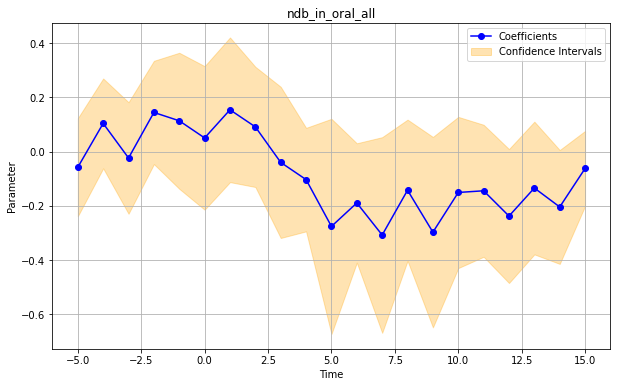

In [8]:
# all data
# period: 15
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+後発品区分+oral+in_hospital+TimeEffects+EntityEffects"
# period:20
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+後発品区分+oral+in_hospital+TimeEffects+EntityEffects"
# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"
mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_all",title="ndb_in_oral_all",period=15)
plot_result(res_fe, file_name="ndb_in_oral_all",title="ndb_in_oral_all",period=20)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3433
Estimator:                   PanelOLS   R-squared (Between):             -0.1533
No. Observations:                 747   R-squared (Within):              -2.4344
Date:                Tue, Aug 22 2023   R-squared (Overall):             -0.6087
Time:                        12:08:54   Log-likelihood                   -1107.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.345
Entities:                          42   P-value                           0.0000
Avg Obs:                       17.786   Distribution:                  F(23,675)
Min Obs:                       6.0000                                           
Max Obs:                       32.000   F-statistic (robust):          5.225e+07
                            

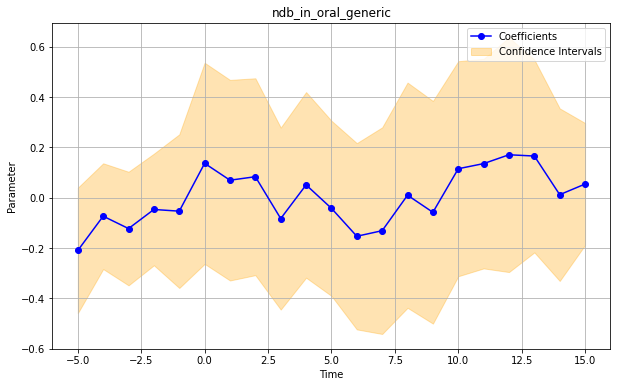

In [9]:
# generic data
formula="log_quantity~elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+oral+in_hospital+TimeEffects+EntityEffects"

# period:20
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+oral+in_hospital+TimeEffects+EntityEffects"
# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=15)
plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=20)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3336
Estimator:                   PanelOLS   R-squared (Between):             -0.5452
No. Observations:                 940   R-squared (Within):              -0.9942
Date:                Tue, Aug 22 2023   R-squared (Overall):             -0.7235
Time:                        12:31:46   Log-likelihood                   -1874.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      18.869
Entities:                          43   P-value                           0.0000
Avg Obs:                       21.860   Distribution:                  F(23,867)
Min Obs:                       14.000                                           
Max Obs:                       32.000   F-statistic (robust):          2.931e+07
                            

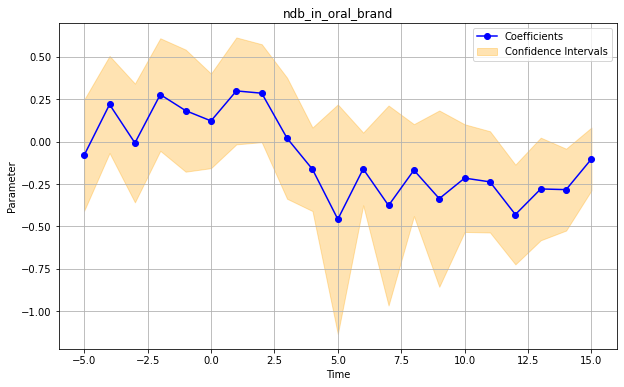

In [12]:
# branded data
formula="log_quantity~ oral+in_hospital+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# period:20
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+oral+in_hospital+TimeEffects+EntityEffects"

# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=15)
plot_result(res_fe, file_name="ndb_in_oral_brand",title="ndb_in_oral_brand",period=20)